In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset
column_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
               'class']
dataset = pd.read_csv('magic04.data', names=column_name)
dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
#balance the dataset
dataset['class'].value_counts()


class
g    12332
h     6688
Name: count, dtype: int64

In [4]:
g = dataset.groupby('class')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
g

fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  \
class                                                                      
g     0      28.6808  12.9785  2.5484  0.3932  0.2362  -1.6727  -10.4705   
      1      34.5936  22.7230  2.9423  0.2821  0.1456  49.7576   26.8458   
      2      13.3406  10.5094  2.3021  0.7930  0.4264 -14.4516   -4.1842   
      3      88.9364  33.7546  3.6536  0.1896  0.0973 -65.8017   62.9067   
      4      38.2496  20.2260  2.6785  0.3396  0.2128   5.9120   31.8818   
...              ...      ...     ...     ...     ...      ...       ...   
h     6683   43.6872  20.4355  2.5720  0.4295  0.2482 -50.1245   34.2563   
      6684   46.3507  18.0768  3.0999  0.2420  0.1448   5.7083  -47.2159   
      6685   17.8190  16.3041  2.6776  0.5168  0.2868  14.5452   12.1542   
      6686  130.4518  27.1369  3.1999  0.3720  0.1883 -98.1669 -109.2498   
      6687   74.0906  23.1378  3.0660  0.2526  0.1349  43.5653   70.0424   

            fM3Trans   fAlpha     fDist class  
class                                          
g     0      -3.6762   5.8695  104.3900     g  
      1     -14.4034   7.1144  128.7610     g  
      2      11.8011  60.8194  192.9240     g  
      3      21.2552   2.6930  319.8990     g  
      4      18.2126  20.8590  214.7700     g  
...              ...      ...       ...   ...  
h     6683   13.7322  71.4563  158.8940     h  
      6684  -14.1545  67.3162  234.0607     h  
      6685  -13.5145   5.9996  135.2800     h  
      6686   11.2795   9.6941  385.4177     h  
      6687   10.7699   2.0336  250.0983     h  

[13376 rows x 11 columns]

In [5]:
#splitting the dataset
X = g.iloc[:, :-1].values
y = g.iloc[:, -1].values

In [6]:
X

array([[ 28.6808,  12.9785,   2.5484, ...,  -3.6762,   5.8695, 104.39  ],
       [ 34.5936,  22.723 ,   2.9423, ..., -14.4034,   7.1144, 128.761 ],
       [ 13.3406,  10.5094,   2.3021, ...,  11.8011,  60.8194, 192.924 ],
       ...,
       [ 17.819 ,  16.3041,   2.6776, ..., -13.5145,   5.9996, 135.28  ],
       [130.4518,  27.1369,   3.1999, ...,  11.2795,   9.6941, 385.4177],
       [ 74.0906,  23.1378,   3.066 , ...,  10.7699,   2.0336, 250.0983]])

In [7]:
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
y = e.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
#normalizing the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.60703026, -0.51099124, -0.61583255, ..., -0.17068565,
        -0.94419361, -1.18790032],
       [-0.48125018, -0.04487179,  0.21391793, ..., -0.63344206,
        -0.89796162, -0.86833416],
       [-0.93335477, -0.62909843, -1.13466359, ...,  0.49698342,
         1.09648696, -0.02699306],
       ...,
       [-0.83808797, -0.35191414, -0.34367271, ..., -0.59509616,
        -0.93936207, -0.78285339],
       [ 1.55789407,  0.16626317,  0.75655241, ...,  0.47448232,
        -0.80215901,  2.49709186],
       [ 0.35895004, -0.02503021,  0.47449202, ...,  0.45249889,
        -1.08664786,  0.7227083 ]])

In [10]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, train_size=0.50,
                                                              random_state=True)

In [11]:
#fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
ypred = classifier.score(X_test, y_test)
print(ypred)


0.7772795216741405


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_validation, y_validation)
ypred = classifier.score(X_test, y_test)
print(ypred)

0.7399103139013453


In [13]:
#apply different values of k and choose the best one using cross validation
from sklearn.model_selection import GridSearchCV
KN = KNeighborsClassifier()
k_range = list(range(1, 26,2))
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(KN,param_grid,cv=10,scoring='accuracy',return_train_score=True)
g=grid.fit(X_train,y_train)

In [14]:
#get the best value of k
print(grid.best_params_)
accuracy=grid.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


{'n_neighbors': 15}
Accuracy for our training dataset with tuning is : 81.37%


In [15]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
test_accuracy=knn.score(X_test,y_test)
print(test_accuracy)

0.7927254608868959


In [16]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_validation_pred=knn.predict(X_validation)
test_accuracy=knn.score(X_validation,y_validation)
print(test_accuracy)

0.8170488534396809


[[862 114]
 [302 729]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       976
           1       0.86      0.71      0.78      1031

    accuracy                           0.79      2007
   macro avg       0.80      0.80      0.79      2007
weighted avg       0.80      0.79      0.79      2007


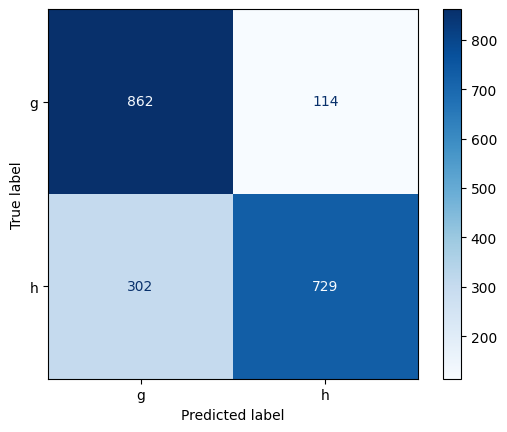

In [17]:
#plotting the confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_test_pred)
print(cm)
print(classification_report(y_test,y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['g','h'])
disp = disp.plot(cmap=plt.cm.Blues)

In [18]:
results = pd.DataFrame(g.cv_results_)
needed_results=results[['param_n_neighbors','mean_train_score','mean_test_score']]
needed_results

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.788422
1,3,0.891713,0.808288
2,5,0.866033,0.810959
3,7,0.854771,0.813630
4,9,0.848209,0.812989
5,11,0.841622,0.812348
6,13,0.836626,0.812027
7,15,0.834455,0.813736
8,17,0.831642,0.811172
9,19,0.829293,0.813202
